#### What did you remember the last time after attending a ML conference, a conversation with your project manager or probably a group discussion at a local meetup?

(2 seconds of pause with peace)

Spikes Spikes Spikes. Your brain might be wandering around different algorithms but the most honest phrase "Get more data!" got slicked through somehow.

![](https://i.pinimg.com/236x/73/28/6a/73286a8725181e82a43366e8ed8d2872--school-psychology-gonna.jpg)

Yep, "Get more data!" works but did you know how exactly getting more data helped your ML model perform better?

Well, this article tries to explain you the science of "Get more data!"

# Why do we require more data?

To understand, lets work on a problem which aptly demonstrates this. <br>

Instead of working with data such as image, text or audio and build complex functions to classify, segment, etc. Lets consider a simple task of fitting a curve called Monkey Saddle using the datapoints derived from the graph.


The function of Monkey Saddle can be represented as follows

$$f(x,y) = x^3 - 3xy^2$$

We restrict the domain values of the function to 
$$x \in [-1, 1] \hspace{0.5cm} and \hspace{0.5cm} y \in [-2, -1]$$

The function(Monkey Saddle) can be graphically represented as follows
![Monkey Saddle Graph](https://upload.wikimedia.org/wikipedia/commons/4/4d/Monkey_saddle_surface.svg)


### The dataset:

Our dataset constitute the pair of $(x_i, y_i)$ values in the domain. Substituting $x_i$ and $y_i$ in the Monkey Saddle function gives us the target value $z_i$.<br>
Considering the decimal property, our domain constitutes infinite values. so how do we generate data? <br>
The obvious solution is to take a step size of maybe 0.1, 0.001, .... <br>
This gives us the power to adjust the data size required to fit our Monkey Saddle function.

In [1]:
# Function to generate dataset given the step size.

import numpy as np

def dataset(step=0.1):
    xyz = []
    
    for x in np.arange(-1, 1, step):  #x domain from [-1, 1]
        for y in np.arange(-2, -1, step):  #y domain form [-2, -1]
            xyz.append([x, y, x**3 - 3*x*y**2]) #store co-ordinates (x,y,z)

    xyz = np.asarray(xyz)
    np.save("xyz" + str(step), xyz)      
    print("Dataset generated of shape " + str(xyz.shape))
    dataset_len = xyz.shape[0]
    return xyz, dataset_len

xyz0_1, dataset_len = dataset(step=0.1)

Dataset generated of shape (200, 3)


### Model:

We use a neural network with 1 hidden layer with 10 nodes. The input layer consists of two nodes which take in the pair ($x_i$, $y_i$) and the output layer consists of a single node which gives the predicted values $f(x_i, y_i)$.

![Neural Network Architecture](img/neural-net-arch.png)

In [2]:
# Define the neural network.

import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 10) #input layer to hidden layer
        self.fc2 = nn.Linear(10, 1) #hidden layer to output layer
    
    def forward(self, x):
        x = F.relu(self.fc1(x)) #activation function as Relu
        x = self.fc2(x)
        return x
    
net = Net()
print(net)

criterion = nn.L1Loss()
optimizer = torch.optim.Adam(net.parameters())

Net(
  (fc1): Linear(in_features=2, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)


## Experiments
<br>
We conduct three experiments, each having dataset of different step sizes 0.1, 0.01 and 0.001 in the domain.<br>
For each experiment we observe training loss, test set loss and the loss function graph.<br>
This demonstrates how increasing the dataset helps us correctly fit the Monkey saddle function.<br>
We certainly know that it performs better with increasing data, but for our intention to uncover the points lets experiment.
<br>

In [3]:
# Lets generate our test data so as to compare results of the 3 experiments.
"""
cmp_xyz, cmp_dataset_len = np.array([0.1, -1.3434, ])
select_cmp = np.random.choice(cmp_dataset_len, 10)
cmp_xyz = cmp_xyz[select_test]
"""

test_xyz = np.load("xyz_test.npy")

test_xy = torch.from_numpy(test_xyz[:,:2]).float()
test_z = torch.from_numpy(test_xyz[:,2]).float().view(-1,1)

### Experiment 1:
Firstly, we shall use step size of 0.1 to generate data. This gives us 200 examples.

In [4]:
# Generate data with step size of 0.1.

xyz0_1, dataset_len = dataset(step=0.1)

Dataset generated of shape (200, 3)


In [5]:
# Fit the monkey saddle curve using the model defined.

num_epochs = 10
batch_size = 10

for epoch in range(num_epochs):
    for i in range(int(dataset_len/batch_size)):
        xy = torch.from_numpy(xyz0_1[i:i+batch_size,:2]).float()
        z = torch.from_numpy(xyz0_1[i:i+batch_size,2]).float().view(-1,1)
        
        optimizer.zero_grad()
        outputs = net(xy)
        loss = criterion(outputs, z)
        loss.backward()
        optimizer.step()
        if (i+1) % batch_size == 0:
            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, int(dataset_len/10), loss.data[0]))
    np.random.shuffle(xyz0_1)

Epoch [1/10], Step [10/20], Loss: 6.4178
Epoch [1/10], Step [20/20], Loss: 5.8171
Epoch [2/10], Step [10/20], Loss: 3.8013
Epoch [2/10], Step [20/20], Loss: 3.7410
Epoch [3/10], Step [10/20], Loss: 3.1574
Epoch [3/10], Step [20/20], Loss: 2.7945
Epoch [4/10], Step [10/20], Loss: 3.0873
Epoch [4/10], Step [20/20], Loss: 3.4688
Epoch [5/10], Step [10/20], Loss: 3.3546
Epoch [5/10], Step [20/20], Loss: 2.8396
Epoch [6/10], Step [10/20], Loss: 3.7936
Epoch [6/10], Step [20/20], Loss: 4.0443
Epoch [7/10], Step [10/20], Loss: 2.5644
Epoch [7/10], Step [20/20], Loss: 2.9177
Epoch [8/10], Step [10/20], Loss: 4.2869
Epoch [8/10], Step [20/20], Loss: 4.0343
Epoch [9/10], Step [10/20], Loss: 3.5992
Epoch [9/10], Step [20/20], Loss: 2.6018
Epoch [10/10], Step [10/20], Loss: 3.5754
Epoch [10/10], Step [20/20], Loss: 3.7249


/Users/yashwanthreddyvirupaksha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


In [6]:
# Test the trained model on test data.

outputs = net(test_xy)
print(torch.cumsum(torch.abs(outputs - test_z), dim=0))

tensor([[  0.5315],
        [  6.5412],
        [  8.4621],
        [ 13.5419],
        [ 15.6804],
        [ 16.3140],
        [ 17.8834],
        [ 24.1450],
        [ 30.9476]])


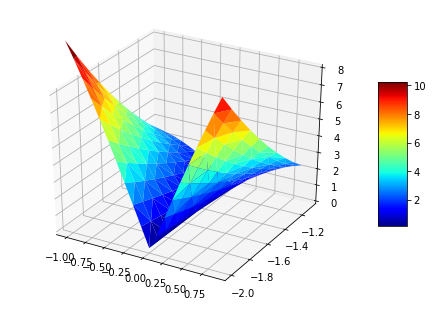

In [9]:
# Plot the loss function

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

xy0_1 = torch.from_numpy(xyz0_1[:,:2]).float()
z0_1 = torch.from_numpy(xyz0_1[:,2]).float().view(-1,1)

outputs0_1 = net(xy0_1)
loss0_1 = []

for i, output in enumerate(outputs0_1):
    loss0_1.append(criterion(output, z0_1[i]).data.numpy().item(0))

loss0_1 = np.array(loss0_1)

fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(xy0_1[:,0].data.numpy(), xy0_1[:,1].data.numpy(), loss0_1, cmap=cm.jet, linewidth=0.1)
ax.set_zlim3d(0, 8)
fig.colorbar(surf, shrink=0.5, aspect=5)
#plt.savefig('test.pdf')

plt.show()

#### Summary of Experiment 1: 
The Train loss is too high showing that the model is not properly trained.<br>
The test loss will eventually be high as the model is not trained properly.<br>
The loss function shows when $x_i$ is 0.0 then the loss is zero and in all other cases the loss is too high, signifying that the model is at its best random.

<br>
<br>
### Experiment 2:
Let's increase our data size by taking a step of 0.01, this increases our dataset length by 100 times making a total length of 20000

In [9]:
# Generate data with step size of 0.1.

xyz0_01, dataset_len = dataset(step=0.01)

Dataset generated of shape (20000, 3)


In [ ]:
# Fit the monkey saddle curve using the model defined.

num_epochs = 10
batch_size = 10

for epoch in range(num_epochs):
    for i in range(int(dataset_len/batch_size)):
        xy = torch.from_numpy(xyz0_01[i:i+batch_size,:2]).float()
        z = torch.from_numpy(xyz0_01[i:i+batch_size,2]).float().view(-1,1)
        
        optimizer.zero_grad()
        outputs = net(xy)
        loss = criterion(outputs, z)
        loss.backward()
        optimizer.step()
        if (i+1) % batch_size == 0:
            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, int(dataset_len/10), loss.data[0]))
    np.random.shuffle(xyz0_01)

Epoch [10/10],&nbsp;&nbsp;Step [1860/2000],&nbsp;&nbsp;Loss: 0.2268<br>
Epoch [10/10],&nbsp;&nbsp;Step [1870/2000],&nbsp;&nbsp;Loss: 0.2215<br>
Epoch [10/10],&nbsp;&nbsp;Step [1880/2000],&nbsp;&nbsp;Loss: 0.1582<br>
Epoch [10/10],&nbsp;&nbsp;Step [1890/2000],&nbsp;&nbsp;Loss: 0.1566<br>
Epoch [10/10],&nbsp;&nbsp;Step [1900/2000],&nbsp;&nbsp;Loss: 0.4383<br>
Epoch [10/10],&nbsp;&nbsp;Step [1910/2000],&nbsp;&nbsp;Loss: 0.2941<br>
Epoch [10/10],&nbsp;&nbsp;Step [1920/2000],&nbsp;&nbsp;Loss: 0.2474<br>
Epoch [10/10],&nbsp;&nbsp;Step [1930/2000],&nbsp;&nbsp;Loss: 0.4053<br>
Epoch [10/10],&nbsp;&nbsp;Step [1940/2000],&nbsp;&nbsp;Loss: 0.4374<br>
Epoch [10/10],&nbsp;&nbsp;Step [1950/2000],&nbsp;&nbsp;Loss: 0.3201<br>
Epoch [10/10],&nbsp;&nbsp;Step [1960/2000],&nbsp;&nbsp;Loss: 0.2450<br>
Epoch [10/10],&nbsp;&nbsp;Step [1970/2000],&nbsp;&nbsp;Loss: 0.3318<br>
Epoch [10/10],&nbsp;&nbsp;Step [1980/2000],&nbsp;&nbsp;Loss: 0.2947<br>
Epoch [10/10],&nbsp;&nbsp;Step [1990/2000],&nbsp;&nbsp;Loss: 0.5700<br>
Epoch [10/10],&nbsp;&nbsp;Step [2000/2000],&nbsp;&nbsp;Loss: 0.2137<br>


In [6]:
# Test the trained model on test data.

outputs = net(test_xy)
print(torch.cumsum(torch.abs(outputs - test_z), dim=0))

tensor([[ 0.0813],
        [ 0.1817],
        [ 0.5189],
        [ 0.5679],
        [ 0.5741],
        [ 0.8567],
        [ 1.0579],
        [ 1.5821],
        [ 2.4337]])


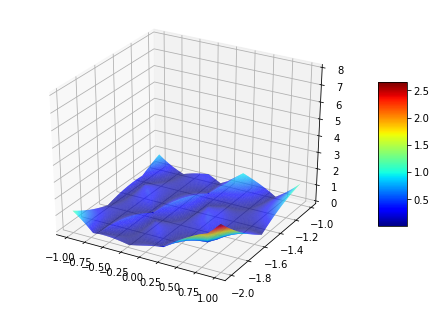

In [7]:
# Plot the loss function

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

xy0_01 = torch.from_numpy(xyz0_01[:,:2]).float()
z0_01 = torch.from_numpy(xyz0_01[:,2]).float().view(-1,1)

outputs0_01 = net(xy0_01)
loss0_01 = []

for i, output in enumerate(outputs0_01):
    loss0_01.append(criterion(output, z0_01[i]).data.numpy().item(0))

loss0_01 = np.array(loss0_01)

fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(xy0_01[:,0].data.numpy(), xy0_01[:,1].data.numpy(), loss0_01, cmap=cm.jet, linewidth=0.1)
ax.set_zlim3d(0, 8)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('teste.pdf')

plt.show()

#### Summary of Experiment 2: 
The Train loss is better when compared to the previous experiment, though we have not properly trained our model.<br>
The test loss has decreased significantly but is not acceptable.<br>
This makes our loss function look reasonably good, with values ranging from 0.0 to 2.5.

<br>
<br>
### Experiment 3:
For this experiment lets take a step size of 0.001, this increases our dataset length by 100 times the dataset we had for the Experiment 2, thus making a total length of 2000000.

In [4]:
# Generate data with step size of 0.1.

xyz0_001, dataset_len = dataset(step=0.001)

Dataset generated of shape (2000000, 3)


In [ ]:
# Fit the monkey saddle curve using the model defined.

num_epochs = 10
batch_size = 30

for epoch in range(num_epochs):
    for i in range(int(dataset_len/batch_size)):
        xy = torch.from_numpy(xyz0_001[i:i+batch_size,:2]).float()
        z = torch.from_numpy(xyz0_001[i:i+batch_size,2]).float().view(-1,1)
        
        optimizer.zero_grad()
        outputs = net(xy)
        loss = criterion(outputs, z)
        loss.backward()
        optimizer.step()
        if (i+1) % batch_size == 0:
            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, int(dataset_len/batch_size), loss.data[0]))
    np.random.shuffle(xyz0_001)

Epoch [10/10], &nbsp;&nbsp;Step [65520/66666], &nbsp;&nbsp;Loss: 0.0534<br>
Epoch [10/10], &nbsp;&nbsp;Step [65550/66666], &nbsp;&nbsp;Loss: 0.0903<br>
Epoch [10/10], &nbsp;&nbsp;Step [65580/66666], &nbsp;&nbsp;Loss: 0.0841<br>
Epoch [10/10], &nbsp;&nbsp;Step [65610/66666], &nbsp;&nbsp;Loss: 0.0669<br>
Epoch [10/10], &nbsp;&nbsp;Step [65640/66666], &nbsp;&nbsp;Loss: 0.0892<br>
Epoch [10/10], &nbsp;&nbsp;Step [65670/66666], &nbsp;&nbsp;Loss: 0.0820<br>
Epoch [10/10], &nbsp;&nbsp;Step [65700/66666], &nbsp;&nbsp;Loss: 0.0926<br>
Epoch [10/10], &nbsp;&nbsp;Step [65730/66666], &nbsp;&nbsp;Loss: 0.0738<br>
Epoch [10/10], &nbsp;&nbsp;Step [65760/66666], &nbsp;&nbsp;Loss: 0.0729<br>
Epoch [10/10], &nbsp;&nbsp;Step [65790/66666], &nbsp;&nbsp;Loss: 0.0802<br>
Epoch [10/10], &nbsp;&nbsp;Step [65820/66666], &nbsp;&nbsp;Loss: 0.0867<br>
Epoch [10/10], &nbsp;&nbsp;Step [65850/66666], &nbsp;&nbsp;Loss: 0.0709<br>
Epoch [10/10], &nbsp;&nbsp;Step [65880/66666], &nbsp;&nbsp;Loss: 0.0677<br>
Epoch [10/10], &nbsp;&nbsp;Step [65910/66666], &nbsp;&nbsp;Loss: 0.1007<br>
Epoch [10/10], &nbsp;&nbsp;Step [65940/66666], &nbsp;&nbsp;Loss: 0.0813<br>
Epoch [10/10], &nbsp;&nbsp;Step [65970/66666], &nbsp;&nbsp;Loss: 0.0901<br>
Epoch [10/10], &nbsp;&nbsp;Step [66000/66666], &nbsp;&nbsp;Loss: 0.0809<br>
Epoch [10/10], &nbsp;&nbsp;Step [66030/66666], &nbsp;&nbsp;Loss: 0.0588<br>
Epoch [10/10], &nbsp;&nbsp;Step [66060/66666], &nbsp;&nbsp;Loss: 0.0572<br>
Epoch [10/10], &nbsp;&nbsp;Step [66090/66666], &nbsp;&nbsp;Loss: 0.0661<br>
Epoch [10/10], &nbsp;&nbsp;Step [66120/66666], &nbsp;&nbsp;Loss: 0.0750<br>
Epoch [10/10], &nbsp;&nbsp;Step [66150/66666], &nbsp;&nbsp;Loss: 0.0568<br>
Epoch [10/10], &nbsp;&nbsp;Step [66180/66666], &nbsp;&nbsp;Loss: 0.0823<br>
Epoch [10/10], &nbsp;&nbsp;Step [66210/66666], &nbsp;&nbsp;Loss: 0.0741<br>
Epoch [10/10], &nbsp;&nbsp;Step [66240/66666], &nbsp;&nbsp;Loss: 0.0918<br>
Epoch [10/10], &nbsp;&nbsp;Step [66270/66666], &nbsp;&nbsp;Loss: 0.0740<br>
Epoch [10/10], &nbsp;&nbsp;Step [66300/66666], &nbsp;&nbsp;Loss: 0.0694<br>
Epoch [10/10], &nbsp;&nbsp;Step [66330/66666], &nbsp;&nbsp;Loss: 0.1080<br>
Epoch [10/10], &nbsp;&nbsp;Step [66360/66666], &nbsp;&nbsp;Loss: 0.0859<br>
Epoch [10/10], &nbsp;&nbsp;Step [66390/66666], &nbsp;&nbsp;Loss: 0.0789<br>
Epoch [10/10], &nbsp;&nbsp;Step [66420/66666], &nbsp;&nbsp;Loss: 0.0821<br>
Epoch [10/10], &nbsp;&nbsp;Step [66450/66666], &nbsp;&nbsp;Loss: 0.0698<br>
Epoch [10/10], &nbsp;&nbsp;Step [66480/66666], &nbsp;&nbsp;Loss: 0.0569<br>
Epoch [10/10], &nbsp;&nbsp;Step [66510/66666], &nbsp;&nbsp;Loss: 0.0724<br>
Epoch [10/10], &nbsp;&nbsp;Step [66540/66666], &nbsp;&nbsp;Loss: 0.0704<br>
Epoch [10/10], &nbsp;&nbsp;Step [66570/66666], &nbsp;&nbsp;Loss: 0.0878<br>
Epoch [10/10], &nbsp;&nbsp;Step [66600/66666], &nbsp;&nbsp;Loss: 0.0909<br>
Epoch [10/10], &nbsp;&nbsp;Step [66630/66666], &nbsp;&nbsp;Loss: 0.0783<br>
Epoch [10/10], &nbsp;&nbsp;Step [66660/66666], &nbsp;&nbsp;Loss: 0.0800<br>

In [6]:
# Test the trained model on test data.

outputs = net(test_xy)
print(torch.cumsum(torch.abs(outputs - test_z), dim=0))

tensor([[ 0.0664],
        [ 0.0984],
        [ 0.1229],
        [ 0.1395],
        [ 0.1939],
        [ 0.4509],
        [ 0.4863],
        [ 0.5676],
        [ 0.6852]])


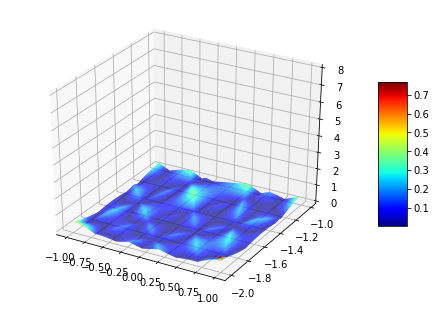

In [12]:
# Plot the loss function

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

xy0_01 = torch.from_numpy(xyz0_01[:,:2]).float()
z0_01 = torch.from_numpy(xyz0_01[:,2]).float().view(-1,1)

outputs0_01 = net(xy0_01)
loss0_01 = []

for i, output in enumerate(outputs0_01):
    loss0_01.append(criterion(output, z0_01[i]).data.numpy().item(0))

loss0_01 = np.array(loss0_01)

fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(xy0_01[:,0].data.numpy(), xy0_01[:,1].data.numpy(), loss0_01, cmap=cm.jet, linewidth=0.1)
ax.set_zlim3d(0, 8)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('teste.pdf')

plt.show()

#### Summary of Experiment 3: 
The Train loss is much better when compared to the previous experiments. Our model is now properly trained!<br>
The test loss has come down to acceptable levels.<br>
Our loss function looks good!



## Cause-and-effect

The typical machine learning process involves the following steps:

1) Input data values to the model, this gives us an hypothesis value.<br>
2) The hypothesis value is compared against the ground truth i.e. loss<br>
3) Then we compute the change in loss with respect to the parameters i.e. gradient descent/backpropogation.<br>
4) The gradients are then used to fine tune parameters.<br>


When we have more data then we have more values to compute against. 
This allows us to compute better gradients thus accurate direction and strength to acheive local minima or possibly global minima.
When we have more and accurate gradients this will guide our parameters to have better values.

This can be illustrated with the given figure:
<br>
<br>

![worst-gradients](img/worst-gradients.png)
<center>Having less data gives us random gradients which does not guide the gradient descent</center>
<br>
<br>

![better-gradients](img/better-gradients.png)
<center>On increasing data we can observe our gradients try to identify local/global minima</center>
<br>
<br>

![best-gradients](img/best-gradients.png)
<center>When we have sufficient data, our gradients look near perfect which have direction and magnitude to help us guide to reach the global minima and therefore provides the best model.</center>
<br>
<br>


## What happens when we evaluate our model on dataset with different distribution?

The problem which we considered is properly defined over a domain in a co-ordinate system. We had modeled our neural network for the values in that domain but what if we evaluate our model on the remaining domain. Do you think it works fine?

Surely, No!

The similar happens with data in the form of image, text, etc. Since they cannot be represented on a co-ordinate system, we cannot define a proper distribution of data. The only thing possible is to consider a hypothetical distribution of data which produces results as accurate to human abilities and gather the data as close as possbile to this distribution. 

<br>
![Un-modeled distribution](img/unmodeled-distribution.png)
<br>

To demonstrate this situtation, we consider our new domain as $x \in [-2, -1] \cup [1, 2] \hspace{0.5cm} and \hspace{0.5cm} y \in [-2.5, -2] \cup [-1, -0.5]$.
Let's evaluate the best model(i.e. with step size 0.001) we have on this domain

In [30]:
#defining our test dataset

def dataset(step=0.1):
    xyz = []

    for x in np.concatenate((np.arange(-2, -1, step), np.arange(1, 2, step))):  #x domain from [-1, 1]
        for y in np.concatenate((np.arange(-2.5, -2, step), np.arange(-1, -0.5, step))):  #y domain form [-2, -1]
            xyz.append([x, y, x**3 - 3*x*y**2]) #store co-ordinates (x,y,z)

    xyz = np.asarray(xyz)
    np.save("xyz" + str(step), xyz)      
    print("Dataset generated of shape " + str(xyz.shape))
    dataset_len = xyz.shape[0]
    return xyz, dataset_len

test_xyz0_1, test_dataset_len = dataset(step=0.1)

Dataset generated of shape (200, 3)


In [31]:
select_test = np.random.choice(test_dataset_len, 10)
test_xyz0_1 = test_xyz0_1[select_test]

xy = torch.from_numpy(test_xyz0_1[:,:2]).float()
z = torch.from_numpy(test_xyz0_1[:,2]).float().view(-1,1)

outputs = net(xy)
print(torch.cumsum(torch.abs(outputs - z), dim=0))

tensor([[  5.9922],
        [  9.7664],
        [ 14.3223],
        [ 16.5625],
        [ 23.8140],
        [ 30.1283],
        [ 44.5587],
        [ 48.4598],
        [ 49.7387],
        [ 51.3987]])


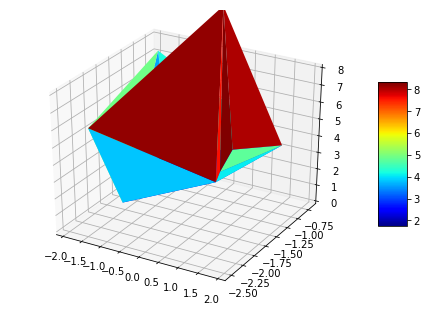

In [32]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

cmp_xy = torch.from_numpy(test_xyz0_1[:,:2]).float()
cmp_z = torch.from_numpy(test_xyz0_1[:,2]).float().view(-1,1)

cmp_outputs = net(cmp_xy)
cmp_loss = []

for i, cmp_output in enumerate(cmp_outputs):
    cmp_loss.append(criterion(cmp_output, cmp_z[i]).data.numpy().item(0))

cmp_loss = np.array(cmp_loss)

fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(cmp_xy[:,0].data.numpy(), cmp_xy[:,1].data.numpy(), cmp_loss, cmap=cm.jet, linewidth=0.1)
ax.set_zlim3d(0, 8)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()